In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2609, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 2609 (delta 86), reused 208 (delta 71), pack-reused 2346
Receiving objects: 100% (2609/2609), 69.71 MiB | 28.51 MiB/s, done.
Resolving deltas: 100% (1167/1167), done.


In [ ]:
cd DeOldify

/content/DeOldify


In [ ]:
from deoldify import device
from deoldify.device_id import DeviceId
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
  print('gpu not available')

In [ ]:
!pip install -r requirements-colab.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 55.2 MB/s eta 0:00:00
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654002 sha256=f21c56f3e492c2fc92b4529aa290c41367033fa86050741ccc50cfac18c3b4e4
  Stored in directory: /root/.cach

In [ ]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.


In [ ]:
! mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2023-10-14 05:21:10--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.199.36.10, 2400:52e0:1e00::863:1
Connecting to data.deepai.org (data.deepai.org)|138.199.36.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  4.92MB/s    in 50s     

2023-10-14 05:22:00 (4.89 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [ ]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can als

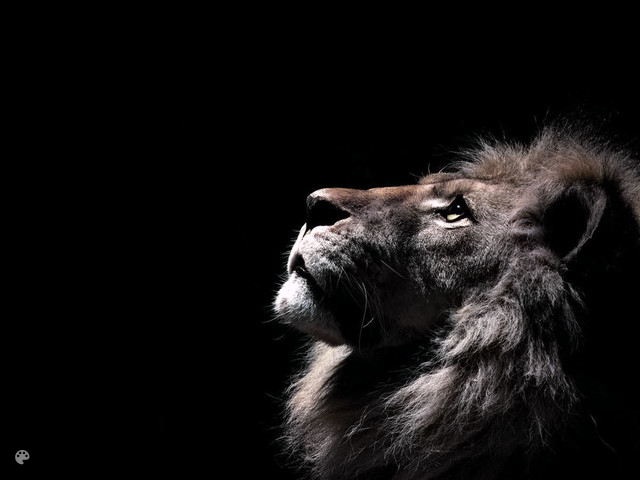

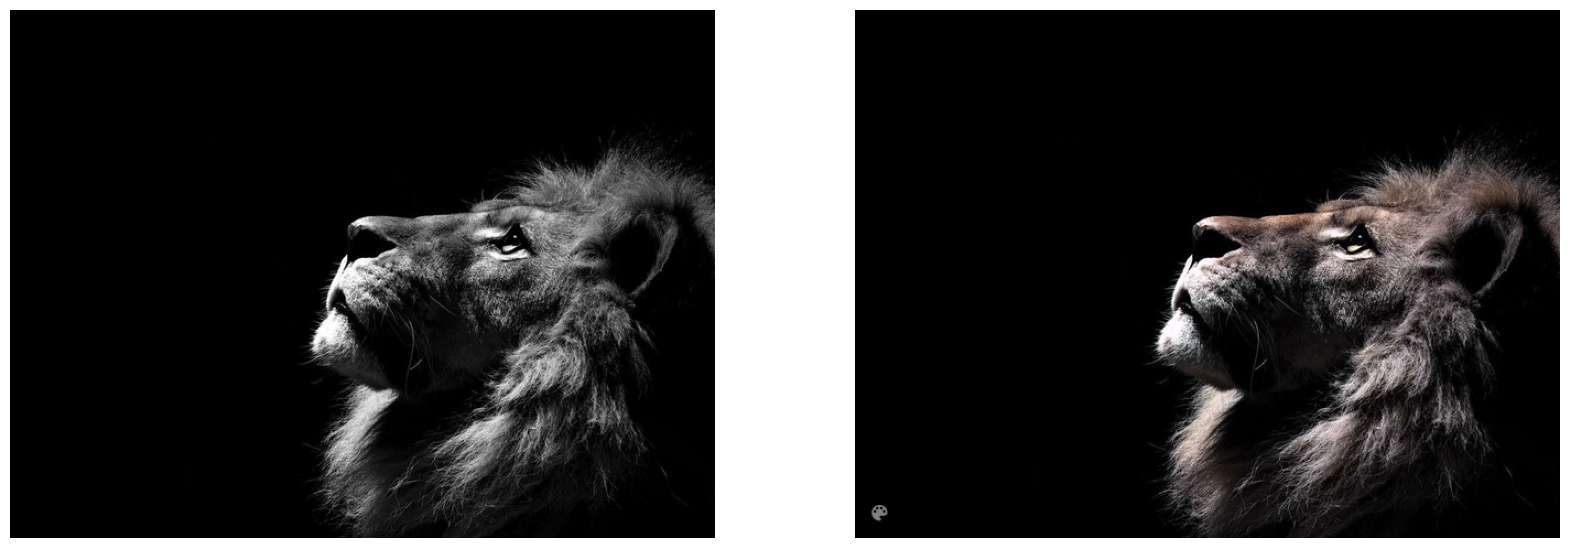

In [ ]:
source_url = "https://i.ibb.co/3Yv4CVy/lion.jpg" #@param {type:"string"}
render_factor = 35 #@param {type: "slider", min:0, max:50}
watermarked = True #@param {type: "boolean"}

if source_url is not None and source_url != '':
  image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
  show_image_in_notebook(image_path)
else:
  print('Provide and image url and the try again.')

In [ ]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))

Output hidden; open in https://colab.research.google.com to view.

In [15]:
!wget https://data.deepai.org/deoldify/ColorizeVideo_gen.pth -O ./models/ColorizeVideo_gen.pth

--2023-10-14 05:38:29--  https://data.deepai.org/deoldify/ColorizeVideo_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.199.37.225, 2400:52e0:1e00::1055:1
Connecting to data.deepai.org (data.deepai.org)|138.199.37.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874066230 (834M) [application/octet-stream]
Saving to: ‘./models/ColorizeVideo_gen.pth’

./models/ColorizeVi 100%[===================>] 833.57M  5.02MB/s    in 2m 51s  

2023-10-14 05:41:20 (4.88 MB/s) - ‘./models/ColorizeVideo_gen.pth’ saved [874066230/874066230]



In [16]:
colorizer = get_video_colorizer()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 194MB/s]


In [23]:
source_url = 'https://youtube.com/shorts/F2b0b_bCeBI?feature=shared' #@param {type:"string"}
render_factor = 21  #@param {type: "slider", min: 5, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    video_path = colorizer.colorize_from_url(source_url, 'video.mp4', render_factor, watermarked=watermarked)
    show_video_in_notebook(video_path)
else:
    print('Provide a video url and try again.')

[youtube] Extracting URL: https://youtube.com/shorts/F2b0b_bCeBI?feature=shared
[youtube] F2b0b_bCeBI: Downloading webpage
[youtube] F2b0b_bCeBI: Downloading ios player API JSON
[youtube] F2b0b_bCeBI: Downloading android player API JSON
[youtube] F2b0b_bCeBI: Downloading m3u8 information
[info] F2b0b_bCeBI: Downloading 1 format(s): 614+140
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 9
[download] Destination: video/source/video.f614.mp4
[download] 100% of    3.66MiB in 00:00:00 at 5.63MiB/s                  
[download] Destination: video/source/video.f140.m4a
[download] 100% of  692.48KiB in 00:00:00 at 8.05MiB/s   
[Merger] Merging formats into "video/source/video.mp4"
Deleting original file video/source/video.f140.m4a (pass -k to keep)
Deleting original file video/source/video.f614.mp4 (pass -k to keep)


INFO:root:Video created here: video/result/video.mp4


Video created here: video/result/video.mp4


In [18]:
for i in range(10,40,2):
    colorizer.vis.plot_transformed_image('video/bwframes/video/00001.jpg', render_factor=i, display_render_factor=True, figsize=(8,8))

Output hidden; open in https://colab.research.google.com to view.

In [21]:
import os
file_path = '/content/DeOldify/video/result/video.mp4'
if os.path.exists(file_path):
    Video(file_path)
else:
    print("File not found.")

from IPython.display import Video
# Replace 'video.mp4' with the actual file name of your uploaded video.
Video('/content/DeOldify/video/result/video.mp4')
